In [1]:
import os
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

## data loading

In [2]:
dataset_path = "data/green_block_corner/train"
# dataset_path = "logdir/test_mimic_sl_50/0"

In [22]:
file_names = sorted(glob.glob(f"{dataset_path}/episode_*.npy"))
# file_names = sorted(glob.glob(f"{dataset_path}/eval_episode_*.npy"))
assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"

max_num_trajectories = None
data = []
for file in tqdm(file_names[:max_num_trajectories]):
    data.append(np.load(file, allow_pickle=True))

100%|██████████| 10/10 [00:00<00:00, 61.36it/s]


In [4]:
# import imageio
# logdir = "tmp"
# os.makedirs(logdir, exist_ok=True)

# for i in range(10):
#     imgs = np.stack([d["front_rgb"] for d in data[i]])
#     imageio.mimsave(os.path.join(logdir, f"data_gen_{i}.mp4"), imgs)


In [5]:
data[0][0].keys()

dict_keys(['lowdim_qpos', 'lowdim_ee', '215122255213_rgb', '215122255213_depth', 'language_instruction', 'action'])

In [23]:
traj_lenghts = [len(sample) for sample in data]
print("mean traj lenght", np.mean(traj_lenghts), "samples", traj_lenghts[:5], "...")

[44, 60, 83, 80, 71, 56, 69, 44, 72, 57]

In [24]:
img_key = "215122255213_rgb"
# img_key = "front_rgb"

In [25]:
ee_pose = np.concatenate([[np.stack(d["lowdim_ee"]) for d in sample] for sample in data])
# qpos_pose = np.concatenate([[np.stack(d["lowdim_qpos"]) for d in sample] for sample in data])
actions = np.concatenate([[np.stack(d["action"]) for d in sample] for sample in data])
imgs = np.concatenate([[np.stack(d[img_key]) for d in sample] for sample in data])

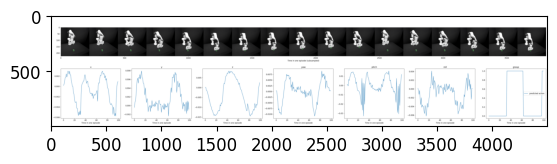

In [154]:
from training.weird_bc.train_script import plot_trajectory

plot_img = plot_trajectory(
            pred_actions=actions[:100],
            true_actions=None,
            imgs=imgs.transpose(0, 3, 1, 2)[:100],
        )

plt.imshow(plot_img)

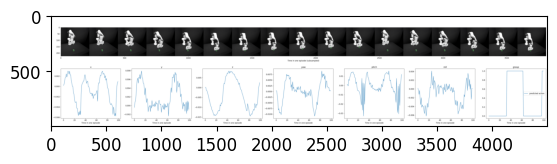

In [155]:
from training.weird_bc.train_script import plot_trajectory

plot_img = plot_trajectory(
            pred_actions=actions[:100],
            true_actions=None,
            imgs=imgs.transpose(0, 3, 1, 2)[:100],
        )

plt.imshow(plot_img)

## video

In [26]:
import imageio
from IPython.display import Video, display
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

imageio.mimwrite('tmp.mp4', imgs[:250])
display(Video('tmp.mp4'))

In [27]:
# real_dataset_path = "data/green_block_sl_50/train"
# real_file_names = glob.glob(f"{real_dataset_path}/episode_*.npy")
# assert len(real_file_names) > 0, f"WARNING: no data in {real_dataset_path}!"

# max_num_trajectories = 100
# real_data = []
# for file in tqdm(real_file_names[:max_num_trajectories]):
#     real_data.append(np.load(file, allow_pickle=True))

# real_img_key = "215122255213_rgb"
# real_imgs = np.concatenate([[np.stack(d[real_img_key]) for d in sample] for sample in real_data])

# import imageio
# from IPython.display import Video, display
# os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

# imageio.mimwrite('tmp.mp4', real_imgs[:250])
# display(Video('tmp.mp4'))

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:00<00:00, 87.08it/s]


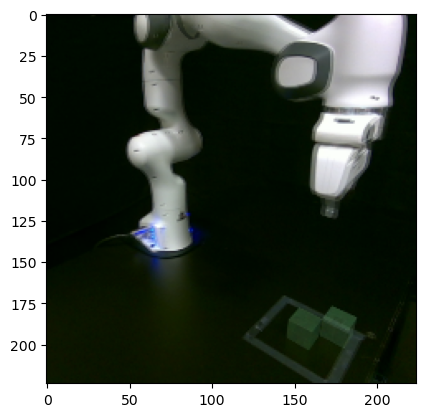

In [11]:
# plt.imshow(imgs[0])
# plt.imshow(real_imgs[0], alpha=0.5)

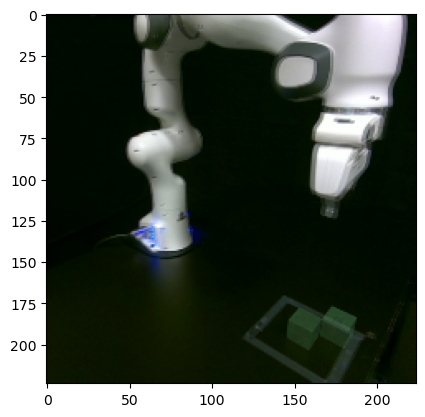

In [12]:
# plt.imshow(real_imgs[0])
# plt.imshow(imgs[0], alpha=0.5)

In [13]:
# act_tmp = actions.copy()

# # Sample 3D data
# a = ee_pose[:, 6] < 0.05
# b = ee_pose[:, 3] < 0.15
# final_mask = np.logical_and(a, b)
# acts = actions[final_mask]
# x, y, z = acts[:, 0], acts[:, 1], acts[:, 2]

# # Create a 3D scatter plot
# fig = go.Figure(
#     data=[
#         go.Scatter3d(
#             x=x,
#             y=y,
#             z=z,
#             mode="markers",
#             # marker=dict(
#             #     size=5,
#             #     color=actions[
#             #         :, -1
#             #     ],  # z,  # set color to an array/list of desired values
#             #     # colorscale='inferno',  # choose a colorscale
#             #     opacity=0.8,
#             # ),
#         )
#     ]
# )

# # Make the plot interactive by allowing user to rotate, zoom, etc.
# fig.update_layout(
#     scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
#     width=700,
#     margin=dict(r=20, b=10, l=10, t=10),
# )

# fig.show()

## poses

In [14]:
ee_space_low = np.array([0.1, -0.4, 0.11, np.pi, np.pi, np.pi, 0.00])
ee_space_high = np.array([0.6, 0.4, 0.5, np.pi, np.pi, np.pi, 0.085])
# ee_space_low = np.array([0.1, -1.0, 0.11, np.pi, np.pi, np.pi, 0.00])
# ee_space_high = np.array([1.0, 1.0, 0.7, np.pi, np.pi, np.pi, 0.085])

In [28]:
frm, to = 0, -1 # 65 + 69, -1

colors = []
for sample in data:
    colors += list(range(0, len(sample)))
colors = np.array(colors)

# Sample 3D data
x, y, z = ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x[frm:to],
            y=y[frm:to],
            z=z[frm:to],
            mode="markers",
            marker=dict(
                size=5,
                color=colors,
                # color=actions[
                #     :, -1
                # ],
                # colorscale='inferno',
                opacity=0.8,
            ),
        )
    ]
)

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z",
        #        xaxis=dict(range=[ee_space_low[0], ee_space_high[0]]),
        # yaxis=dict(range=[ee_space_low[1], ee_space_high[1]]),
        # zaxis=dict(range=[ee_space_low[2], ee_space_high[2]])
        ),
    width=700,
    margin=dict(r=20, b=10, l=10, t=10),
)

fig.show()

## actions

In [29]:
# Sample 3D data
x, y, z = actions[:, 0], actions[:, 1], actions[:, 2] # ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=5,
                                               color=colors, # actions[:,-1], # z,  # set color to an array/list of desired values
                                               #colorscale='inferno',  # choose a colorscale
                                               opacity=0.8))])

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()


In [17]:
actions.max(axis=0), actions.min(axis=0)

(array([0.02524494, 0.01221416, 0.05723583, 0.02854123, 0.04267816,
        0.03610523, 1.        ]),
 array([-0.04524007, -0.01148341, -0.0443631 , -0.03053915, -0.08017664,
        -0.03043083,  0.        ]))

In [18]:
# Sample 3D data
def shortest_angle(angles):
    return (angles + np.pi) % (2*np.pi) - np.pi
actions[:, 3:6] = shortest_angle(actions[:, 3:6])

x, y, z = actions[:, 3], actions[:, 4], actions[:, 5] # ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=5,
                                               color=colors, # actions[:,-1], # z,  # set color to an array/list of desired values
                                               #colorscale='inferno',  # choose a colorscale
                                               opacity=0.8))])

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()


In [19]:
eval_dataset_path = "data/green_block_sl_10_sim/train"

eval_file_names = sorted(glob.glob(f"{eval_dataset_path}/episode_*.npy"))
# eval_file_names = sorted(glob.glob(f"{eval_dataset_path}/eval_episode_*.npy"))
assert len(eval_file_names) > 0, f"WARNING: no data in {eval_dataset_path}!"

eval_data = []
for file in tqdm(eval_file_names):
    eval_data.append(np.load(file, allow_pickle=True))

eval_ee_pose = np.concatenate([[np.stack(d["lowdim_ee"]) for d in sample] for sample in eval_data])
eval_actions = np.concatenate([[np.stack(d["action"]) for d in sample] for sample in eval_data])
# eval_imgs = np.concatenate([[np.stack(d[img_key]) for d in sample] for sample in eval_data])

100%|██████████| 10/10 [00:00<00:00, 16.51it/s]


In [20]:
# Sample 3D data
x = np.concatenate([ee_pose[:, 0], eval_ee_pose[:, 0]])
y = np.concatenate([ee_pose[:, 1], eval_ee_pose[:, 1]])
z = np.concatenate([ee_pose[:, 2], eval_ee_pose[:, 2]])
colors = np.zeros(len(x))
colors[len(ee_pose):] = 1

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=5,
                                               color=colors, # actions[:,-1], # z,  # set color to an array/list of desired values
                                               colorscale='viridis',
                                               opacity=0.8))])

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()


## obj poses

In [21]:
stats = np.load(os.path.join(dataset_path, "obj_poses_train.npy"), allow_pickle=True).tolist()
poses = stats["obj_poses"]
successes = stats["successes"]

FileNotFoundError: [Errno 2] No such file or directory: 'data/green_block_corner/train/obj_poses_train.npy'

Text(0, 0.5, 'x')

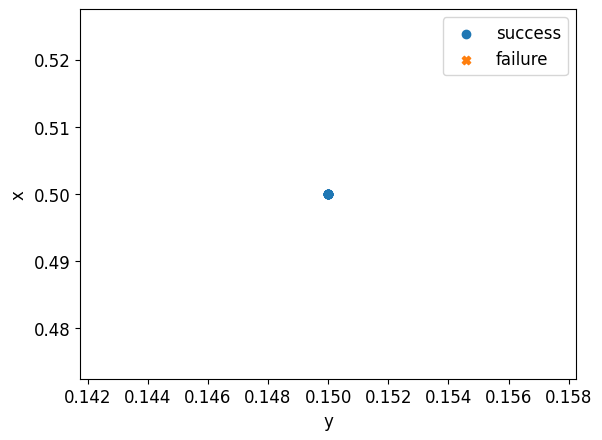

In [ ]:
poss = [pos for pos in poses[:,:3]]
poss = np.stack(poss)

plt.scatter(poss[successes, 1], poss[successes, 0], color="tab:blue", label="success")
plt.scatter(poss[~successes, 1], poss[~successes, 0], color="tab:orange", marker="X", label="failure")
plt.legend()
plt.xlabel("y")
plt.ylabel("x")

Text(0.5, 0, 'yaw')

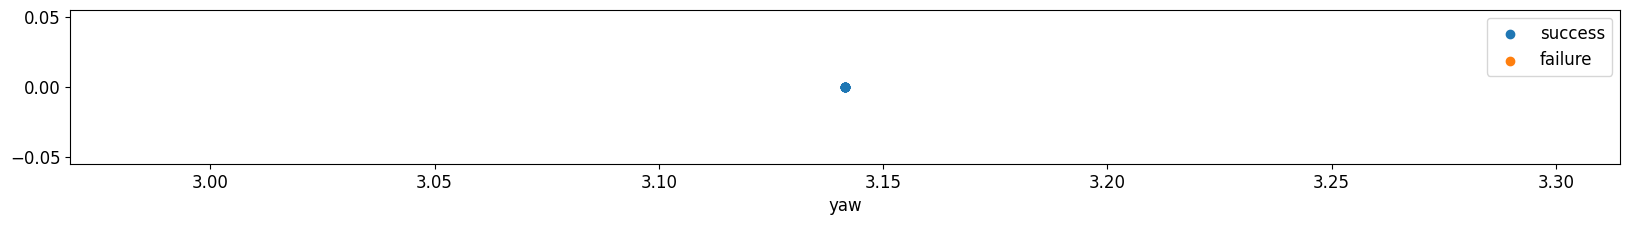

In [ ]:
oris = [ori for ori in poses[:,3:]]
oris = np.stack(oris)

plt.figure(figsize=(20,2))
plt.scatter(oris[successes, 2], np.zeros_like(oris[successes, 0]), color="tab:blue", label="success")
plt.scatter(oris[~successes, 2], np.zeros_like(oris[~successes, 0]), color="tab:orange", label="failure")
plt.legend()
plt.xlabel("yaw")

In [ ]:
# some of the outer angle randomizations fail

In [ ]:
# modify data
split = "train"
dataset_path = "data/green_block_sl_10_left/" + split
save_path = "data/green_block_sl_10_left_blocking/" + split
os.makedirs(save_path, exist_ok=True)
key = "front_rgb"

file_names = glob.glob(f"{dataset_path}/episode_*.npy")
assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"

for file in tqdm(file_names):
    data = np.load(file, allow_pickle=True)
    for i in range(len(data)-1):
        data[i]["action"][...,:6] = data[i+1]["lowdim_ee"][...,:6] - data[i]["lowdim_ee"][...,:6]
    # for i in range(len(data)):
    #     data[i][key] = data[i][key].transpose(1,2,0)
    file = os.path.join(save_path, file.split("/")[-1])
    np.save(file, data)

100%|██████████| 25/25 [00:00<00:00, 37.58it/s]


In [ ]:
data["action"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices